# 0. Basic Operations on Images

## Goal：

Learn to:
* Access pixel values and modify them
* Access image properes
* Setting Region of Image (ROI)
* Splitng and Merging images

## (1) Accessing and Modifying pixel values

Let’s load a color image first:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# TODO 
# This is my images' absolute route, you have to edit
path = "/Users/fanghao_w/Desktop/Py_OpenCV_Tutorial/images/cat.jpg"
img = cv2.imread(path) # Default reading flag, 1, RGB images

print(img.shape)

(600, 600, 3)


You can access a pixel value by its row and column coordinates. For BGR image, it returns an
array of Blue, Green, Red values. For grayscale image, just corresponding intensity is
returned.

In [2]:
px = img[100,100]
print(px)
print(type(px))

red_point = img[100,100,2] # For B->G->R is corresponding to 0->1->2
print(red_point)

[130 130 142]
<class 'numpy.ndarray'>
142


You can modify the pixel values the same way.

In [3]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


<font color=#FF0000 >! Warning</font>

Numpy is a opmized library for fast array calculaons. So simply accessing each and
every pixel values and modifying it will be very slow and it is discouraged.

<font color=#008000 >! Note</font>

For individual pixel access, Numpy array methods,
array.item() and array.itemset() is considered to be better

In [4]:
# accessing RED value
print(img.item(10,10,2))

# modifying RED value
img.itemset((10,10,2),100)
print(img.item(10,10,2))

92
100


<font color=#008000 >! Note</font>

`img.dtype` is very important while debugging because a large number of errors in
OpenCV-Python code is caused by invalid datatype.

In [5]:
img.dtype

dtype('uint8')

The Coordinate in img[row,col,channel] is displayed as below:

![np_datatype]("./figs/np_datatype.png")

The value limit is [0,255], and its datatype is normally "uint8":
* Note : in different color space, the value limit is dierent, too.

255


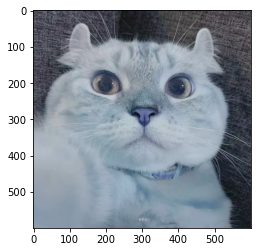

In [6]:
img_test = img.copy()

# TODO
# img_test[100,100] = 260
# # Remeber : 'float' data type is absolutely different from 'int'!!!
# img_test = np.ones(img.shape,dtype='float64')
# img_test[:,:,0:2] = 0.0

try:
    plt.imshow(img_test)
except:
    print(Exceptiom)

print(img_test[100,100,1])

## (2) Image ROI

Somemes, you will have to play with certain region of images. For eye detection in images,
first perform face detection over the image until the face is found, then search within the
face region for eyes. This approach improves accuracy (because eyes are always on faces :D )
and performance (because we search for a small area).

ROI is again obtained using Numpy indexing. Here I am selecng the cat's face:

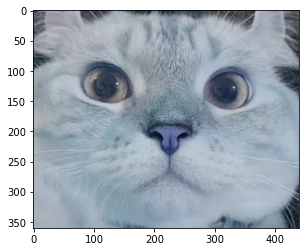

In [7]:
head = img[80:440, 80:520]
plt.imshow(head)
# if you are using .py script, you have to add 'plt.show()', or you won't see the figure!

## (3) Splitting and Merging Image Channels

The B,G,R channels of an image can be split into their individual planes when needed. Then,
the individual channels can be merged back together to form a BGR image again. This can be
performed by:

In [8]:
# cv method : slow
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

In [9]:
# numpy method : fast
b = img[:,:,0]

Suppose, you want to make all the red pixels to zero, you need not split like this and put it
equal to zero. You can simply use Numpy indexing which is faster.

In [10]:
img[:,:,0] = np.zeros(img.shape[:2])
# Or you can even do this:
img[:,:,0] = 0
# Above operation is called "Broadcast" in Nmupy

## (4) Exercise

Try to use plt to make the img looks like its original png
* Hint : plt.imshow(img), the img should have the RGB channel order

In [11]:
# TODO
